In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import matplotlib as mpl
from scipy.optimize import curve_fit

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,12)))
# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)

runstr='Dry'
dftab=pd.read_pickle('dfs/df_run_02_dry_delta_tab.pkl')
df=pd.read_pickle('dfs/df_run_02_dry.pkl')

# runstr='Wet'
# dftab=pd.read_pickle('dfs/df_run_02_land_delta_tab.pkl')
# df=pd.read_pickle('dfs/df_run_02_land.pkl')

tlfs=df.tlf.unique()
dftab['tal']=round((dftab.t-dftab.tlf)*24,2)

In [170]:
def plot_ts(ax,d):
    ax.plot(tlfs,d.dat,'kx-')
    ax.grid(True)
    ax.set_ylabel(d.lab)
    ax.set_xlabel('t$_{LF}$ (d)')
    
class Var:
    def __init__(self,vid,vdat,vlab):
        self.id=vid
        self.dat=vdat
        self.lab=vlab

class Pltdat:
    def __init__(self,x,y,eq):
        self.x=x
        self.y=y
        self.eq=eq
        
def get_a_Pdmax(dft,tlf,tmin=1,tmax=3,ax=False,sq=False,hat=False,Vmax0=1):
#     tal=dft['t']-dft['tlf']
    dft=dft[dft.tlf.eq(tlf) & dft.r.gt(5)]
    dft=dft.query('r <= rV10max*1.0')
    dft=dft.query('t - tlf < ' + str(tmax) +'/24.')
    dft=dft.query('t - tlf > ' + str(tmin) +'/24.')
    dft=dft.query('dPdr > 0')
    tals=dft.tal.unique()
    x=[];y=[];
    for tal in tals:
        dftal=dft[dft.tal.eq(tal)]
        x.append(Pe-dftal.Pmin.head(1).values[0])
        y.append(dftal.vrcol.tail(1).values[0])
    x=np.array(x)
    y=np.array(y)
    if hat:
        x=x/Pe
    if sq:
        x=x**2
#     x=x*Vmax0**0.0
#     y=y
    
    xcol = x[:,np.newaxis]
    m, _, _, _ = np.linalg.lstsq(xcol, y,rcond=None)

    if ax:
        fs=8
        ax.plot(x,y,'r.')
        
        ax.set_title('t$_{lf}$='+str(tlf))
        ax.grid(True)
#         ax.set_xlabel('P$_{\Delta0}$ (hPa)')
        if sq:
#             ax.set_xlabel('$\hat{P}^2*V_{max0}^{0.5}$')
            ax.set_xlabel('$\hat{P}^2$')
        ax.set_ylabel('$vr_{colRmax} (m/s)$')
        r2=np.corrcoef(x,y)[0,1]**2
        ax.text(0.05,0.85,"R$^2$={:2.2f}".format(r2),transform=ax.transAxes,fontsize=fs)
        
        ax.set_xlim((0,ax.get_xlim()[1]))
        ax.set_ylim((0,ax.get_ylim()[1]))
        xl=np.array(ax.get_xlim())
#         ax.plot(xl,m*xl+c,'k',lw=2)
        ax.plot(xl,m*xl,'k',lw=2)
        ax.plot(x,y,'r.')
        
    return(m[0])

def fit_thalf(t,y,ylab,ax=False):
    ly = np.log(y)
    K, A_log = np.polyfit(t, ly, 1)
    A = np.exp(A_log)
    thalf=-np.log(2)/K
    yf=np.exp(A_log+t*K)
    
    if ax:
        ax.plot(t*24,y)
        ax.plot(t*24,yf,'--')
        ax.grid(True)
        ax.set_title('t$_{lf}$='+str(tlf))
        ax.set_xlabel('t (h)')
        ax.set_ylabel(ylab)
        ax.set_xlim((0,12))        
    return(thalf)

def fit_thalf_alg(t,y,ylab,ax=False):
    def algd(x,k,a):
        return(1/(k*x+a))
#     print(t)
    t=t-t.values[0]
    pa0=[0.07602148, 0.01205749]
    fita,fitcova=curve_fit(algd,t,y,p0=pa0)
    thalf=fita[1]/fita[0]
    yf=algd(t,fita[0],fita[1])
#     print(fita) 
    if ax:
        ax.plot(t*24,y,'k')
        ax.plot(t*24,yf,'--r')
        ax.grid(True)
        ax.set_title('t$_{lf}$='+str(tlf))
        ax.set_xlabel('t (h)')
        ax.set_ylabel(ylab)
        ax.set_xlim((0,12))
        ax.set_ylim((0,0.1))
    return(thalf)

Getting vars
[1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5]
CoV(a)=0.3156620753510979
Calculating half lives
plotting time series


<ipython-input-171-18a3d255e06a>:91: RuntimeWarning: invalid value encountered in sqrt
  Var('sqrtVmax0',[np.sqrt(x-30) for x in Vmax0],'sqrt(Vmax0) (m/s)'),


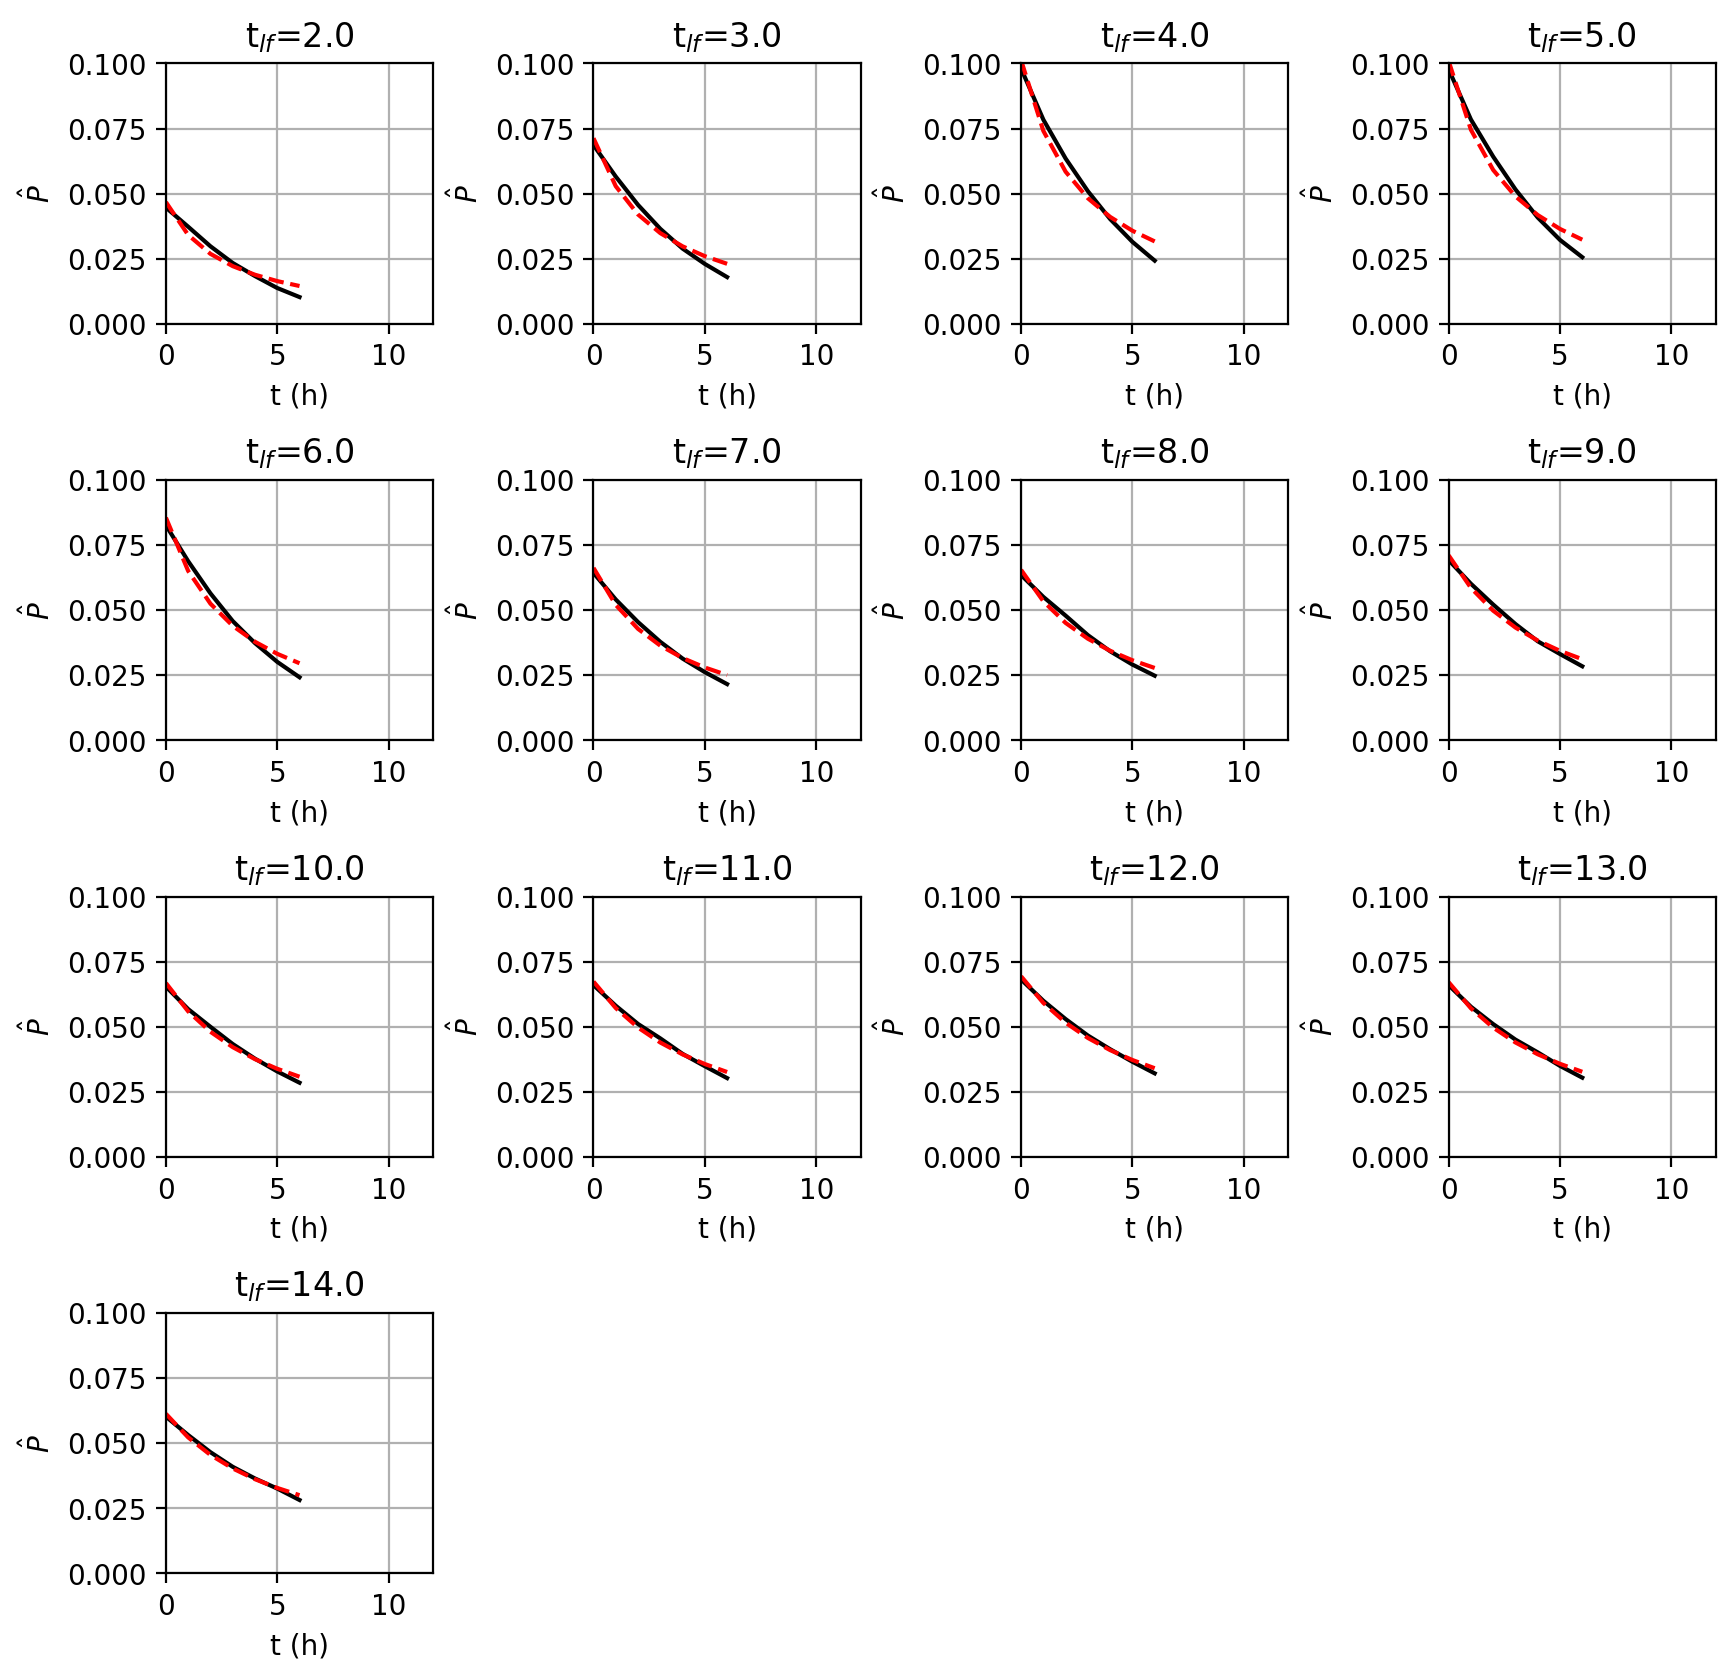

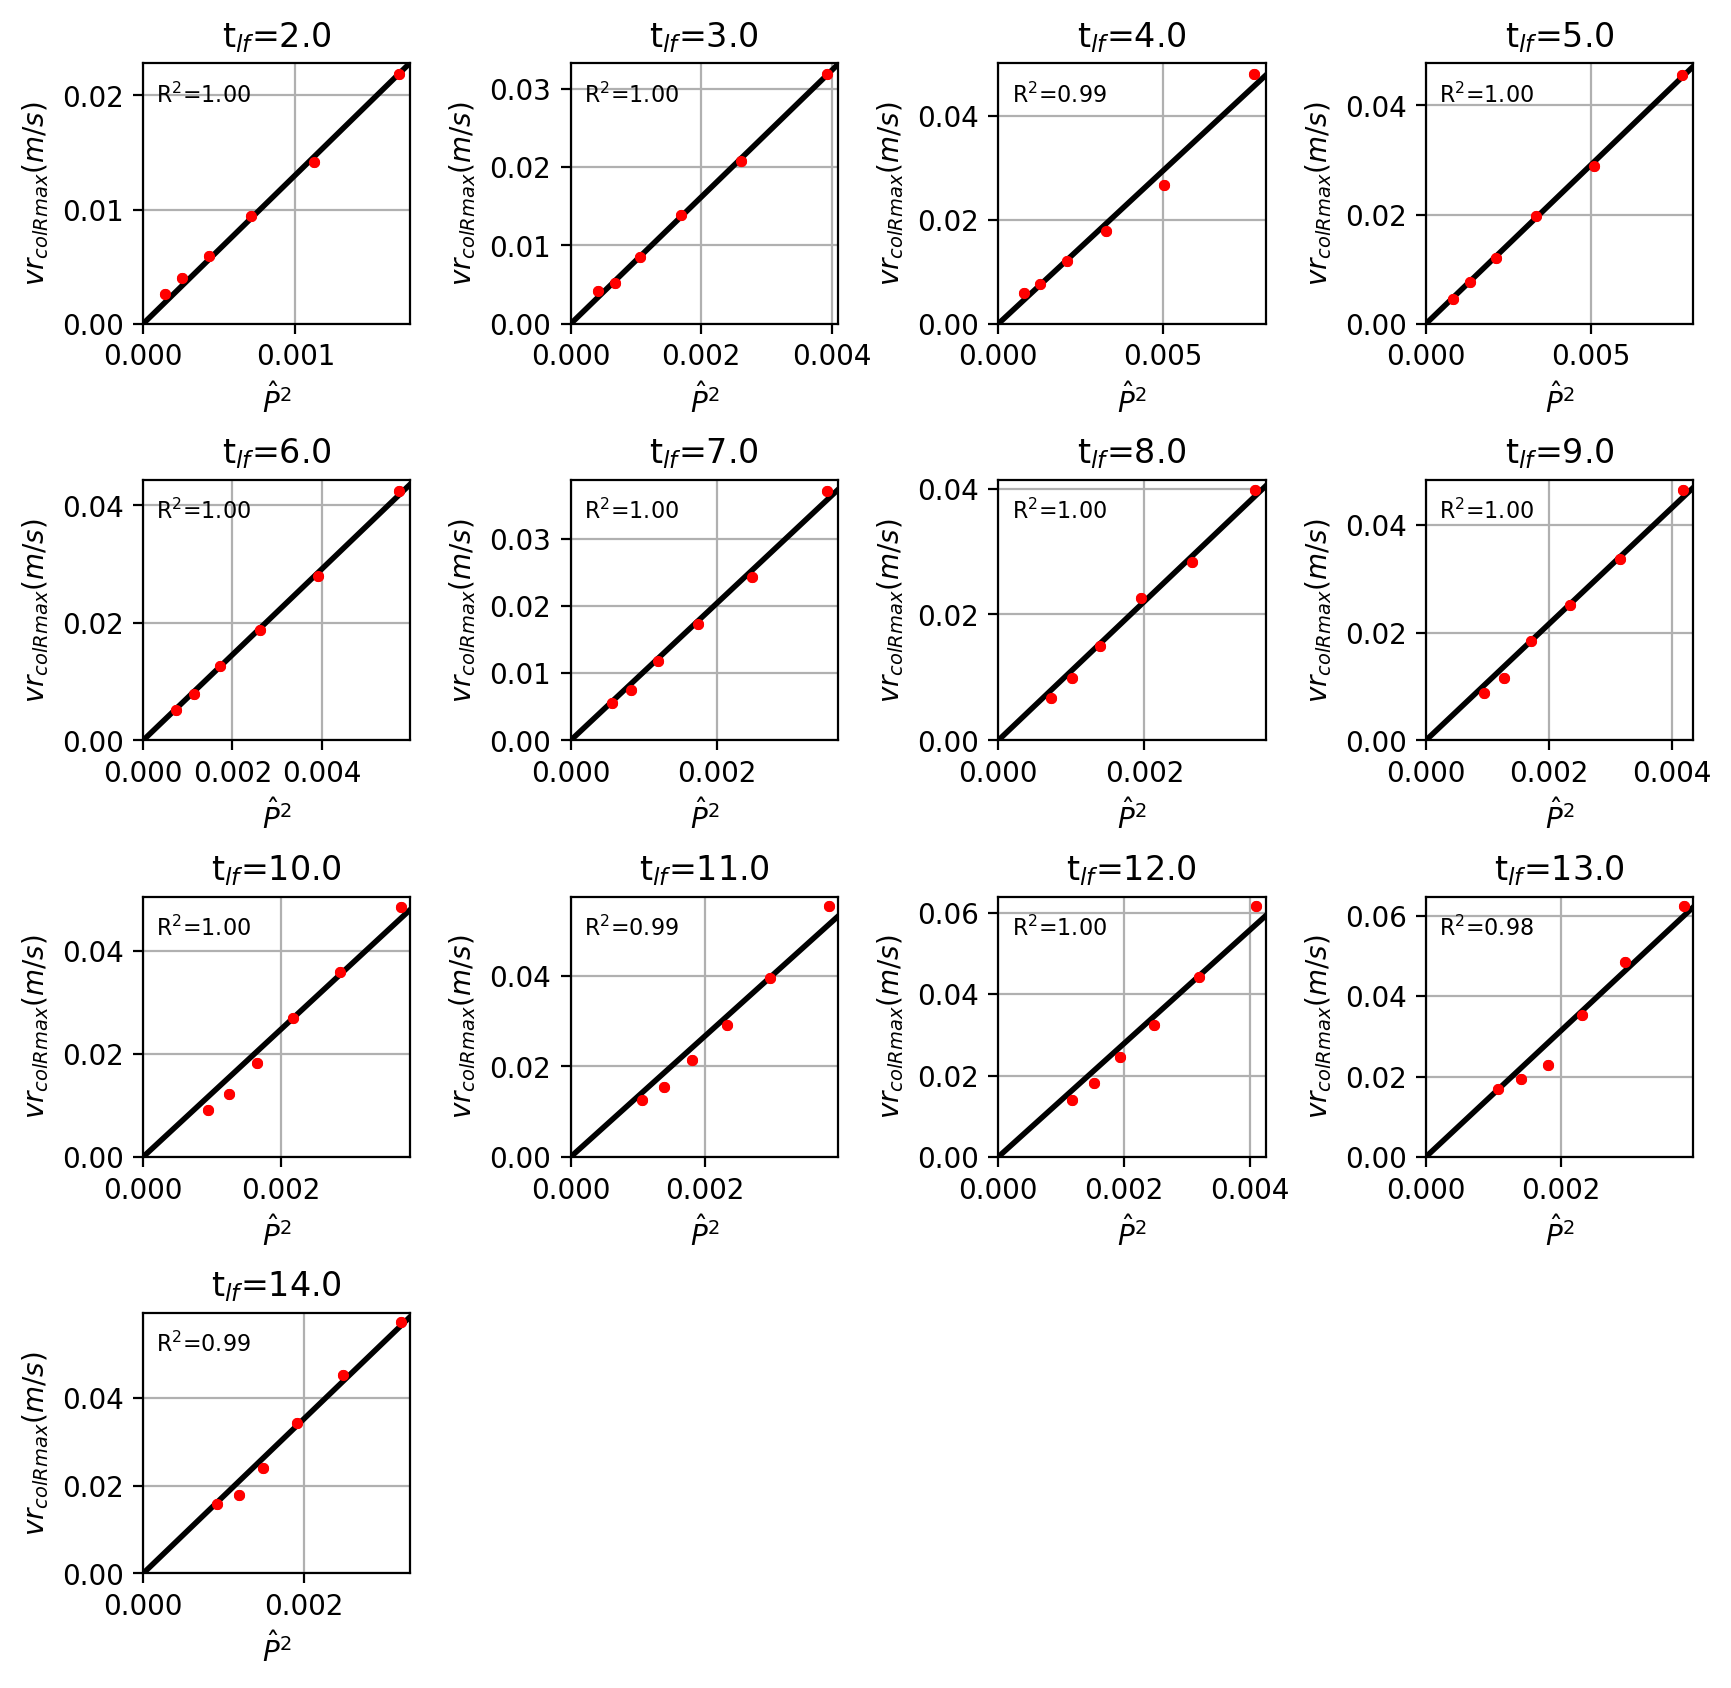

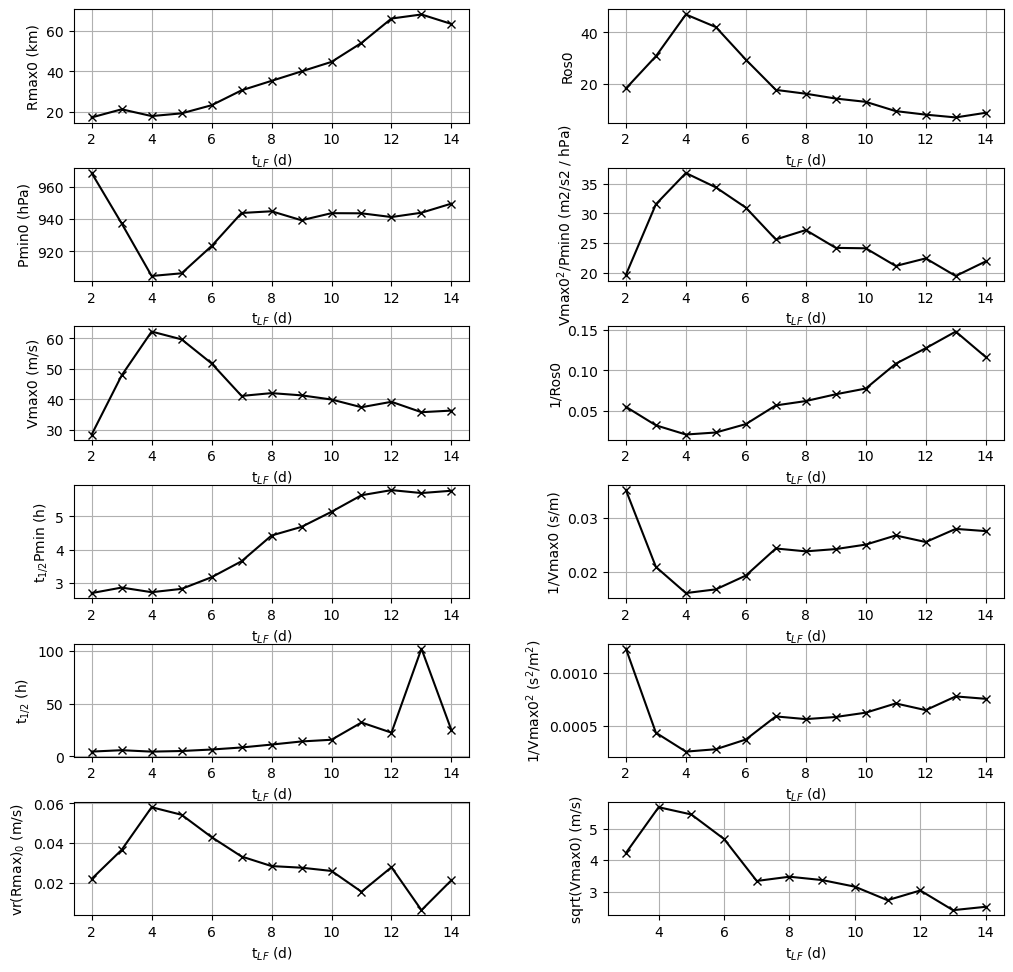

In [171]:
figs=[]; axss=[]
for i in range(2):
    fig,axs=plt.subplots(4,4,sharex=False,dpi=200,figsize=(10,10))
    plt.subplots_adjust(hspace=0.6,wspace=0.6)
    for i in range(len(tlfs),len(axs.flat)):
        axs.flat[i].axis('off')
    figs.append(fig)
    axss.append(axs)
    
fig5,axs5=plt.subplots(6,2,sharex=False,dpi=100,figsize=(12,12))
plt.subplots_adjust(hspace=0.4,wspace=0.35)
# for i in range(11,len(axs5.flatten(order='F'))):
#     axs5.flatten(order='F')[i].axis('off')

# a=[];thP=[];thV=[];thR=[];Rmax0=[];Pmin0=[];Vmax0=[];a_sqrt=[];a_sqrt_rdPdr_oP=[];a_rPd=[];a_sqrtrPd=[];

a_vrPd0=[];thP=[];a_vrr=[];Rmax0=[];Pmin0=[];vrRmax0=[];Vmax0=[];Ros0=[];a_vrPhat2=[];
Pe=1010
tmind=1
tmaxd=7
tmina=1
tmaxa=7

print('Getting vars')
for n,tlf in enumerate(tlfs):
    dftab_f=dftab[dftab.tlf.eq(tlf)]
    df_f=df[df.tlf.eq(tlf)]
    t=df_f.t-df_f.tlf
    Pmin=df_f.Pmin
    tals=sorted(dftab_f.tal.unique())
    print(tals)
    tal=tals[0]
    
    dftab_f=dftab_f.query('r <= rV10max*1.0')
    dftal=dftab_f[dftab_f.tal.eq(tal)]
    vr=dftal.vrcol
    vrRmax=vr.tail(1)
    pmin=dftal.Pmin.tail(1)
    rmax=dftal.rV10max.tail(1)
    vmax=dftal.V10max.tail(1)

    vrRmax0.append(vrRmax.array[0])
    Pmin0.append(pmin.array[0])
    Rmax0.append(rmax.array[0])
    Vmax0.append(vmax.array[0])
    
    f=2*np.sin(30*(np.pi/180))*7.2921150E-5
#     Rmax0.append(np.mean(df_f.rV10max.head(1)))
#     Vmax0.append(np.mean(df_f.V10max.head(1)))
#     Pmin0.append(np.mean(df_f.Pmin.head(1)))
    Ros0.append(np.mean(df_f.V10max.head(1))/(1000*np.mean(df_f.rV10max.head(1))*f))
    thP.append(24*fit_thalf_alg(t[tmind:tmaxd+1],(Pe-Pmin[tmind:tmaxd+1])/Pe,ax=axss[0].flat[n],ylab='$\hat{P}$'))
    a_vrPhat2.append(get_a_Pdmax(dftab,tlf,ax=axss[1].flat[n],tmin=tmina,tmax=tmaxa,sq=True,hat=True,Vmax0=Vmax0[-1]))
#     a_vrvmaxPhat2.append(get_a_Pdmax(dftab,tlf,ax=axss[1].flat[n],tmin=tmina,tmax=tmaxa,sq=True,hat=True))

Pmin0=np.array(Pmin0)
Vmax0=np.array(Vmax0)

a=a_vrPhat2
print('CoV(a)='+str(np.std(a)/np.mean(a)))

print('Calculating half lives')
# def calc_thalf_aRmax(Rmax,a,Pe):
#     return(np.log(2)*Rmax/(2*Pe*a))

# def calc_thalf_aRmaxPhat(Rmax,a,Phat,Vmax):
#     return(Rmax*Vmax**0/(2*a*Phat))

def calc_thalf(Rmax,Phat,vrRmax0):
    return(1000*Rmax*Phat/(2*vrRmax0))

# tha_aRmax=[calc_thalf_aRmax(Rmax*1000,az,Pe*100)/(60*60) for Rmax,az in zip (Rmax0,a_vrPd0)]
# tha_aRmaxPhat=[calc_thalf_aRmaxPhat(Rmax0a*1000,az,Pmin0a/Pe,Vmax0a)/(60*60)*10 for Rmax0a,az,Pmin0a,Vmax0a in zip (Rmax0,a_vrPhat2,Pmin0,Vmax0)]
tha=[calc_thalf(Rmax0a,(Pe-Pmin0a)/Pe,vrRmax0a)/(60*60) for Rmax0a,Pmin0a,vrRmax0a in zip (Rmax0,Pmin0,vrRmax0)]


vars=(
    Var('Rmax0',Rmax0,'Rmax0 (km)'),
    Var('Pmin0',Pmin0,'Pmin0 (hPa)'),
    Var('Vmax0',Vmax0,'Vmax0 (m/s)'),
    Var('thP',thP,'t$_{1/2}$Pmin (h)'),
    Var('tha',tha,'t$_{1/2}$ (h)'),
#     Var('tha_aRmaxPhat',tha_aRmaxPhat,'t$_{1/2}$aRmaxPhat (h)'),
#     Var('a_vrPhat2',a_vrPhat2,'a vr/$\hat{P}^2$ (m/s)'),
    Var('vrRmax0',vrRmax0,'vr(Rmax)$_0$ (m/s)'),
    Var('Ros0',Ros0,'Ros0'),
    Var('V2overP',Vmax0**2/(Pe-Pmin0),'Vmax0$^2$/Pmin0 (m2/s2 / hPa)'),
    Var('Ros0rec',[1/x for x in Ros0],'1/Ros0'),
    Var('Vmax0rec',[1/x for x in Vmax0],'1/Vmax0 (s/m)'),
    Var('Vmax0rec2',[1/x**2 for x in Vmax0],'1/Vmax0$^2$ (s$^2$/m$^2$)'),
    Var('sqrtVmax0',[np.sqrt(x-30) for x in Vmax0],'sqrt(Vmax0) (m/s)'),
)

# if runstr=='Wet':
#     vars=vars+(Var('thR',thR,'t$_{1/2}$Rain (h)'),)

vd = {var.id: var for var in vars}

print('plotting time series')
axsf=axs5.flatten(order='F')
for ax,d in zip(axsf,vars):
    plot_ts(ax,d)

plotting scatters


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


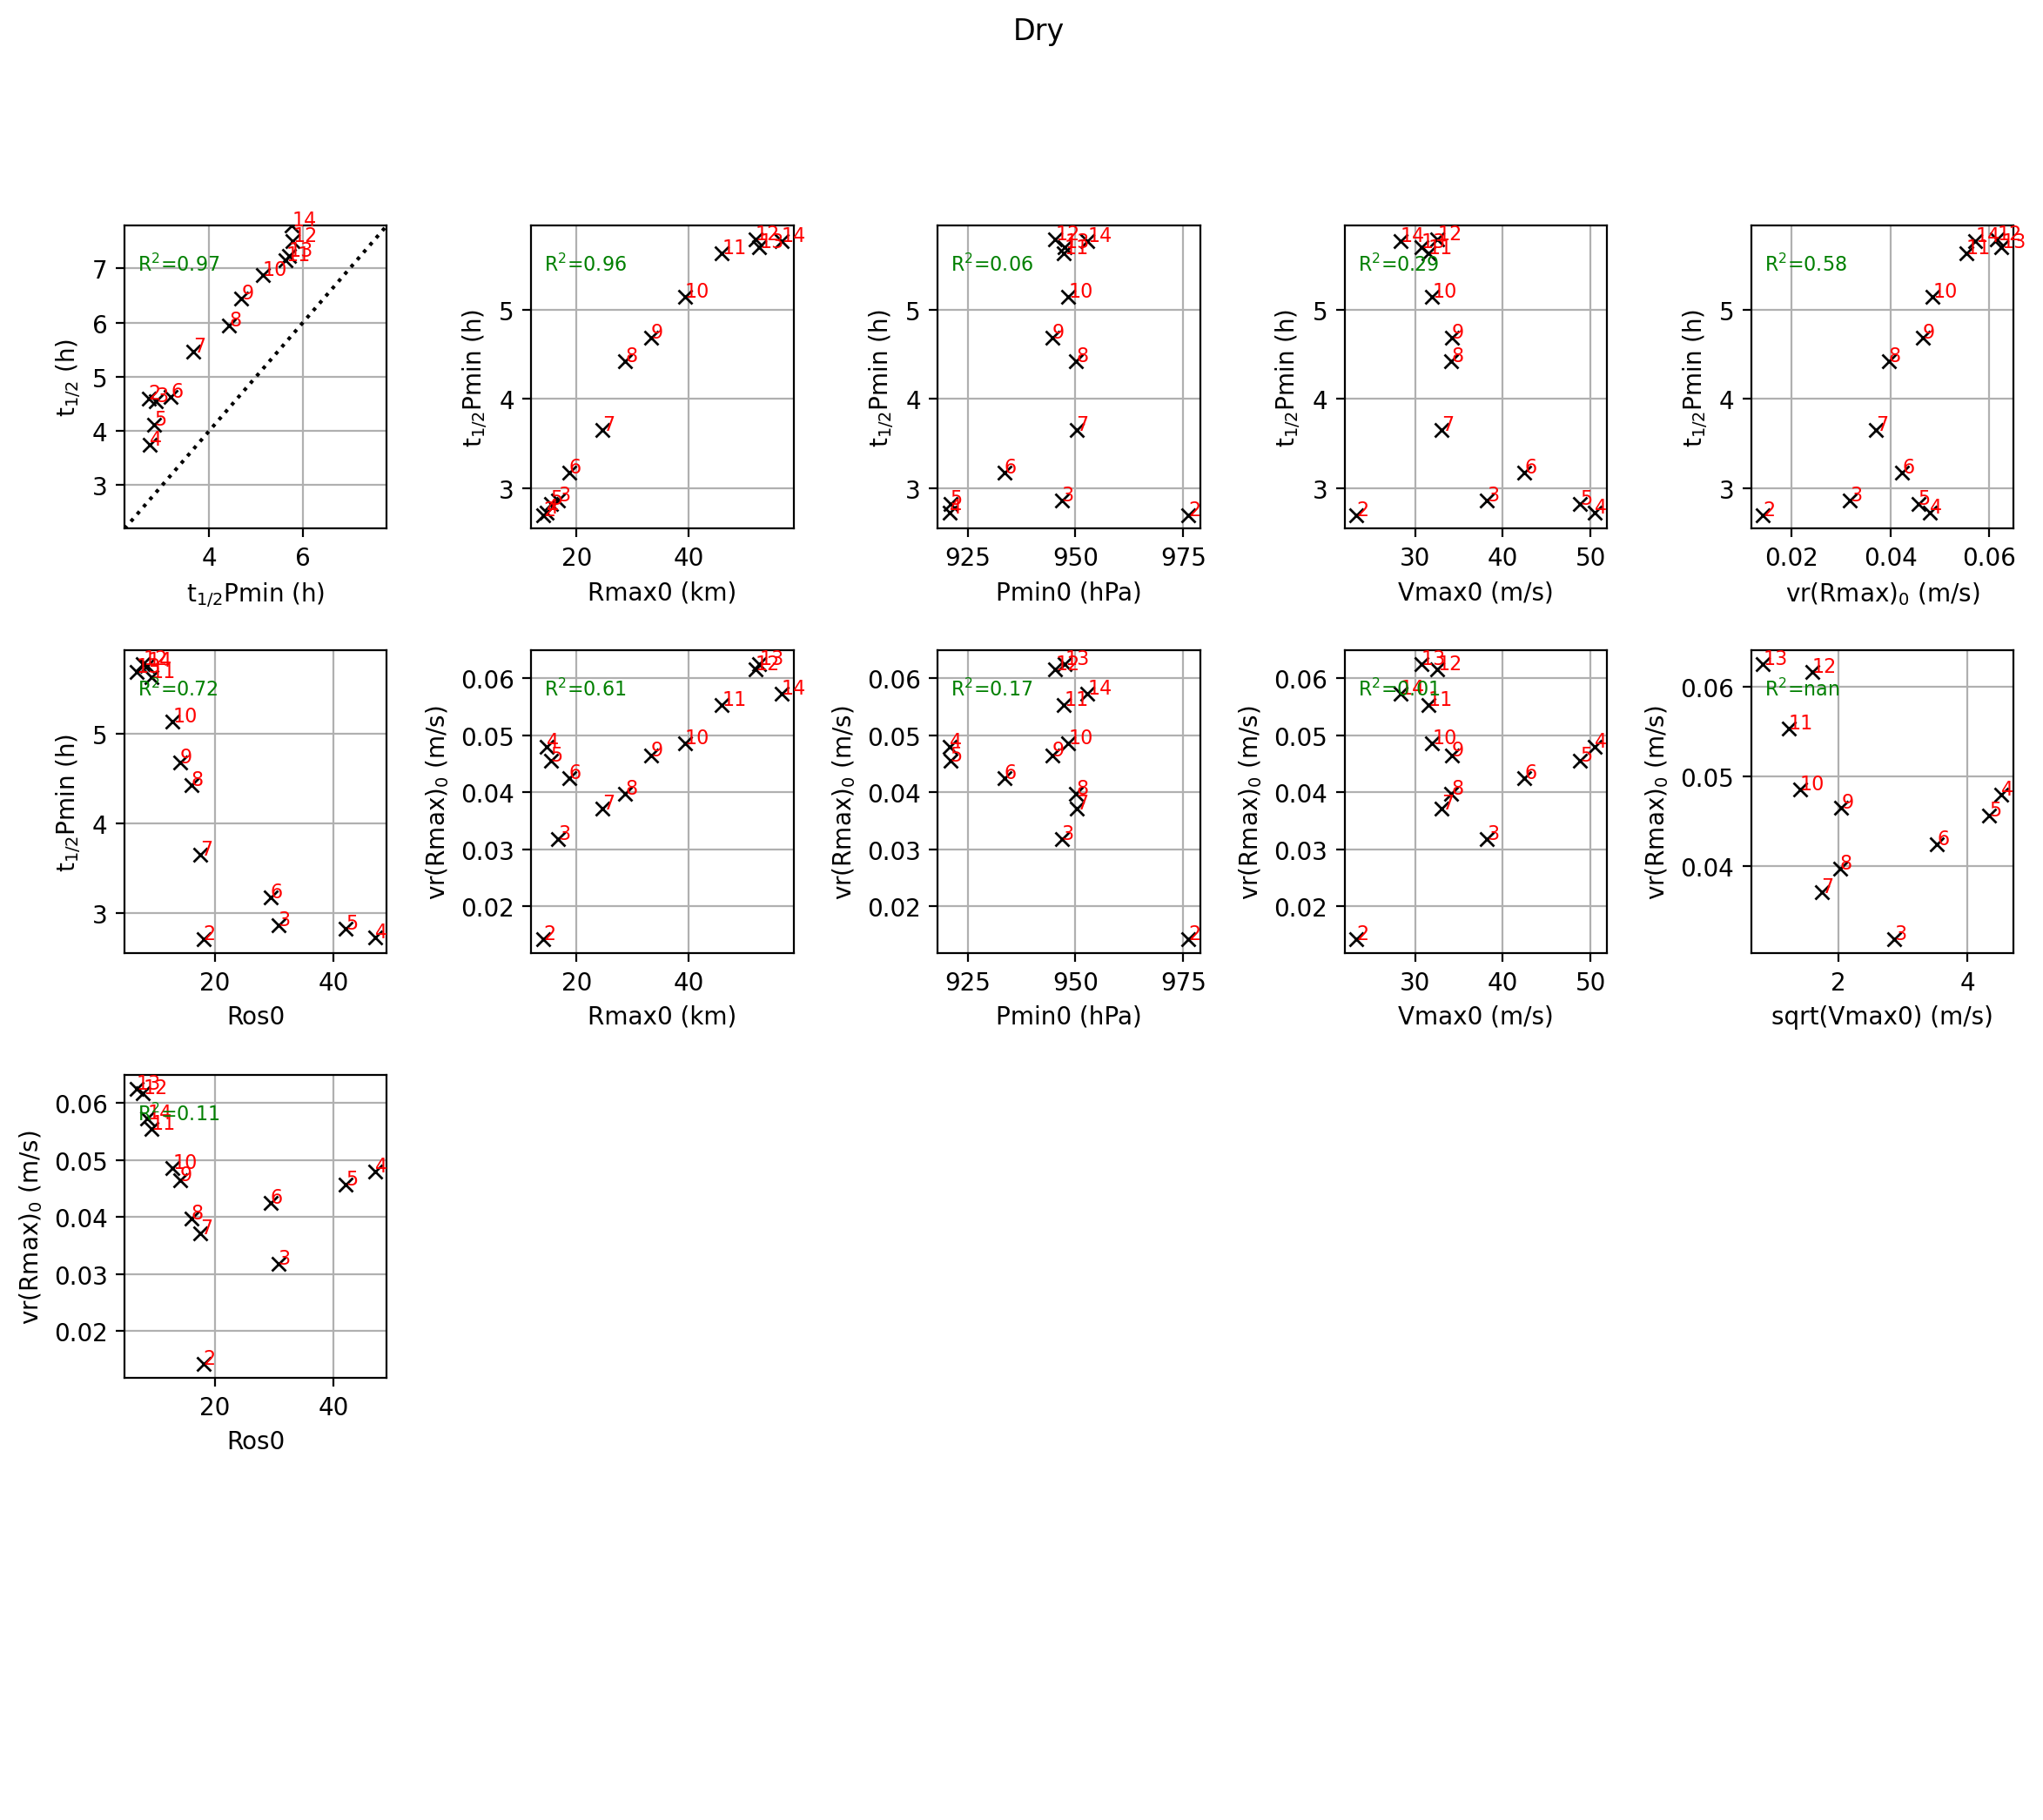

In [165]:
def plot_scat(ax,d):
    ax.plot(d.x.dat,d.y.dat,'xk')
    ax.grid(True)
    ax.set_xlabel(d.x.lab)
    ax.set_ylabel(d.y.lab)
    for tlf,x,y in zip(tlfs,d.x.dat,d.y.dat):
        ax.text(x,y,round(tlf),fontsize=fs,color='r')
    r2=np.corrcoef(d.x.dat,d.y.dat)[0,1]**2
    ax.text(0.05,0.85,"R$^2$={:2.2f}".format(r2),transform=ax.transAxes,fontsize=fs,color='g')
    if d.eq:
        axr=[np.min((d.x.dat,d.y.dat)),np.max((d.x.dat,d.y.dat))]
        axr[0]=axr[0]-0.1*(axr[1]-axr[0])
        axr[1]=axr[1]+0.1*(axr[1]-axr[~0])
        ax.plot(axr,axr,':k')
        ax.set_xlim(axr)
        ax.set_ylim(axr)
        
print('plotting scatters')
fs=8
fig,axs=plt.subplots(4,5,dpi=200,figsize=(14,12))
plt.subplots_adjust(hspace=0.4,wspace=0.55)
        
pltdats=(
#     Pltdat(vd['thP'],vd['tha_aRmax'],True),
    Pltdat(vd['thP'],vd['tha'],True),
    
    Pltdat(vd['Rmax0'],vd['thP'],False),
    Pltdat(vd['Pmin0'],vd['thP'],False),
    Pltdat(vd['Vmax0'],vd['thP'],False),
    Pltdat(vd['vrRmax0'],vd['thP'],False),
    Pltdat(vd['Ros0'],vd['thP'],False),
#     Pltdat(vd['a_vrPhat2'],vd['thP'],False),
#     Pltdat(vd['Rmax0'],vd['a_vrPhat2'],False),
#     Pltdat(vd['Pmin0'],vd['a_vrPhat2'],False),
#     Pltdat(vd['Vmax0'],vd['a_vrPhat2'],False),
#     Pltdat(vd['vrRmax0'],vd['a_vrPhat2'],False),
#     Pltdat(vd['Ros0'],vd['a_vrPhat2'],False),
#     Pltdat(vd['Ros0rec'],vd['a_vrPhat2'],False),
#     Pltdat(vd['Vmax0rec'],vd['a_vrPhat2'],False),
#     Pltdat(vd['Vmax0rec2'],vd['a_vrPhat2'],False),

    Pltdat(vd['Rmax0'],vd['vrRmax0'],False),
    Pltdat(vd['Pmin0'],vd['vrRmax0'],False),
    Pltdat(vd['Vmax0'],vd['vrRmax0'],False),
    Pltdat(vd['sqrtVmax0'],vd['vrRmax0'],False),
    Pltdat(vd['Ros0'],vd['vrRmax0'],False),  
)

# if runstr=='Wet':
#     pltdats=pltdats+(
#         Pltdat(vd['thP'],vd['thR'],True),
#         Pltdat(vd['rmax'],vd['thR'],False),
# )

for ax,pltdat in zip(axs.flatten(),pltdats):
    plot_scat(ax,pltdat)
plt.suptitle(runstr);
for i in range(len(pltdats),len(axs.flat)):
    axs.flat[i].axis('off')